In [1]:
suppressMessages(require(data.table))
suppressMessages(require(anndata))
library(corto)
suppressMessages(require(Seurat))
library(aracne.networks)
if(!exists("foo", mode="function")) source("../vst.R")

Loading required package: viper

Loading required package: Biobase

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following object is masked from ‘package:SeuratObject’:

    intersect


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'citation("pkgname")'.


Loading required package: S4Vectors

In [2]:
library(readr)


Attaching package: ‘readr’


The following object is masked from ‘package:anndata’:

    read_csv




In [34]:
'''
col_names <- colnames(fread("../../HIV_data/single_cell_scorch/exc_v2_pbulk_controls.tsv", nrows=0))
row_names <- as.matrix(fread('../../HIV_data/single_cell_scorch/exc_v2_pbulk_controls.tsv',header = TRUE,
                                   select = grep("gene", col_names, value = TRUE)))
counts_controls <- as.matrix(fread('../../HIV_data/single_cell_scorch/exc_v2_pbulk_controls.tsv',header = TRUE,
                                   select = grep("L3-5", col_names, value = TRUE)))
num_cols_controls <- ncol(counts_controls)
counts_controls <- matrix(as.numeric(counts_controls),ncol=num_cols_controls)
rownames(counts_controls) <- row_names
colnames(counts_controls) <- c(1:num_cols_controls)


col_names <- colnames(fread("../../HIV_data/single_cell_scorch/exc_v2_pbulk_hiv.tsv", nrows=0))
row_names <- as.matrix(fread('../../HIV_data/single_cell_scorch/exc_v2_pbulk_hiv.tsv',header = TRUE,
                                   select = grep("gene", col_names, value = TRUE)))
counts_hiv <- as.matrix(fread('../../HIV_data/single_cell_scorch/exc_v2_pbulk_hiv.tsv',header = TRUE,
                                   select = grep("L3-5", col_names, value = TRUE)))
num_cols_hiv <- ncol(counts_hiv)
counts_hiv <- matrix(as.numeric(counts_hiv),ncol=num_cols_hiv)
rownames(counts_hiv) <- row_names
colnames(counts_hiv) <- c(1:num_cols_hiv)
'''

In [2]:
counts_hiv <- as.matrix(fread('../../HIV_data/single_cell_scorch/exc_v2_pbulk_hiv.tsv',header=TRUE))
rows_names <- counts_hiv[,1]
counts_hiv <- counts_hiv[,-1]
num_cols_hiv <- ncol(counts_hiv)
counts_hiv <- matrix(as.numeric(counts_hiv),ncol=num_cols_hiv)
rownames(counts_hiv) <- rows_names
colnames(counts_hiv) <- c(1:num_cols_hiv)


counts_controls <- as.matrix(fread('../../HIV_data/single_cell_scorch/exc_v2_pbulk_controls.tsv',header = TRUE))
rows_names <- counts_controls[,1]
counts_controls <- counts_controls[,-1]
num_cols_controls <- ncol(counts_controls)
counts_controls <- matrix(as.numeric(counts_controls),ncol=num_cols_controls)
rownames(counts_controls) <- rows_names
colnames(counts_controls) <- c(1:num_cols_controls)


In [4]:
counts_controls

,1,2,3,4,5,6,7,8,9,10,⋯,116,117,118,119,120,121,122,123,124,125
A1BG,9,3,8,2,4,2,10,0,9,47,⋯,1,0,3,2,2,0,7,1,2,1
A1CF,0,1,2,0,2,1,2,0,2,11,⋯,0,1,1,0,0,0,2,0,5,1
A2M,61,9,25,8,55,1,23,0,52,208,⋯,5,47,7,7,4,0,16,13,11,27
A2ML1,17,3,11,2,13,4,13,0,9,96,⋯,1,10,4,3,5,2,2,3,0,5
A3GALT2,0,2,6,0,2,2,2,0,6,6,⋯,0,1,0,0,0,0,2,0,0,0
A4GALT,0,0,1,0,0,1,0,0,0,2,⋯,0,1,0,0,0,0,1,0,0,0
A4GNT,2,0,1,0,0,0,0,0,0,0,⋯,0,0,0,1,0,0,0,0,0,0
AAAS,31,4,14,6,15,18,11,4,30,87,⋯,5,7,10,2,6,0,5,2,7,13
AACS,411,162,229,100,259,220,323,38,392,1333,⋯,40,71,113,76,187,7,77,37,64,179
AADAC,0,0,0,0,1,0,1,0,0,3,⋯,0,0,0,0,0,0,0,0,0,0


In [10]:
counts_adv_AD <- as.matrix(fread('../../AD_data/SEA_AD/MTG/RNAseq/raw_counts_pseudobulks/pbulk_adv_AD.tsv',header=TRUE))
rows_names <- counts_adv_AD[,1]
counts_adv_AD <- counts_adv_AD[,-1]
num_cols_adv <- ncol(counts_adv_AD)
counts_adv_AD <- matrix(as.numeric(counts_adv_AD),ncol=num_cols_adv)
rownames(counts_adv_AD) <- rows_names
colnames(counts_adv_AD) <- c(1:num_cols_adv)


counts_controls_AD <- as.matrix(fread('../../AD_data/SEA_AD/MTG/RNAseq/raw_counts_pseudobulks/pbulk_controls.tsv',header = TRUE))
rows_names <- counts_controls_AD[,1]
counts_controls_AD <- counts_controls_AD[,-1]
num_cols_controls <- ncol(counts_controls_AD)
counts_controls_AD <- matrix(as.numeric(counts_controls_AD),ncol=num_cols_controls)
rownames(counts_controls_AD) <- rows_names
colnames(counts_controls_AD) <- c(1:num_cols_controls)

In [13]:
counts_adv_AD

,1,2,3,4,5,6,7,8,9,10,⋯,989,990,991,992,993,994,995,996,997,998
A1BG,9,3,13,11,32,15,9,9,15,11,⋯,48,11,7,50,44,31,40,33,26,29
A1BG-AS1,10,2,11,4,24,22,5,9,12,6,⋯,62,37,9,103,125,88,54,81,35,86
A1CF,8,0,13,2,0,2,6,0,4,3,⋯,5,0,0,1,4,0,2,0,0,1
A2M,162,57,112,227,87,462,82,74,88,61,⋯,113,4,1,58,41,12,33,19,25,25
A2M-AS1,64,32,78,61,96,128,34,25,96,56,⋯,55,29,8,65,72,50,87,52,40,65
A2ML1,809,110,1146,942,1547,617,302,290,1256,386,⋯,105,10,4,30,40,16,15,32,18,21
A2ML1-AS1,253,19,265,67,91,100,123,54,126,151,⋯,240,40,9,152,162,80,79,112,26,63
A2ML1-AS2,0,0,0,0,0,0,0,0,1,0,⋯,1,0,0,0,0,0,0,0,0,0
A3GALT2,0,0,3,1,11,6,3,0,5,5,⋯,13,4,1,7,9,9,9,16,5,16
A4GALT,52,46,92,114,318,496,52,66,198,70,⋯,12,3,0,7,7,5,3,7,9,7


In [5]:
transcription_factors <- c(as.matrix(fread('/gpfs/group/sanna/tfgenes_2022_06_12.txt')[,2]))

In [6]:
typeof(transcription_factors)

[1] "character"

In [18]:
all_adv <- cbind(counts_adv_AD,counts_controls_AD)
colnames(all_adv) <- c(1:(num_cols_adv+num_cols_controls))
keep_adv <- apply(all_adv, 1, function(x) length(unique(x[!is.na(x)])) != 1)
reg_adavanced_AD <- corto(vst(all_adv[keep_adv,]), transcription_factors)

converting counts to integer mode



In [20]:
saveRDS(reg_adavanced_AD,file = '../../AD_data/SEA_AD/MTG/RNAseq/raw_counts_pseudobulks/regulon_SEA_AD_advanced_AD_vst_normalized.RDS')

In [12]:
reg_adv_AD <- readRDS('../../AD_data/SEA_AD/MTG/RNAseq/raw_counts_pseudobulks/regulon_SEA_AD_advanced_AD_vst_normalized.RDS')

In [13]:
reg_adv_AD

Object of class regulon with 2009 regulators, 21268 targets and 373730 interactions

In [3]:
Celine <- load('~/hbtrc_pfc_153_sym-regulon.rda')
Celine_regulon <- mget('regulon')$regulon

In [36]:
mra_exc <- mra(expmat1 = vst(counts_hiv), expmat2 = vst(counts_controls), regulon = Celine_regulon,nthreads = 16)

converting counts to integer mode

converting counts to integer mode



In [37]:
saveRDS(mra_exc,file = '../../results/SCORCH_HIV/mra_exc_hiv_Celine_regulon.RDS')

In [38]:
counts_hiv <- as.matrix(fread('../../HIV_data/single_cell_scorch/inh_v2_pbulk_hiv.tsv',header=TRUE))
rows_names <- counts_hiv[,1]
counts_hiv <- counts_hiv[,-1]
num_cols_hiv <- ncol(counts_hiv)
counts_hiv <- matrix(as.numeric(counts_hiv),ncol=num_cols_hiv)
rownames(counts_hiv) <- rows_names
colnames(counts_hiv) <- c(1:num_cols_hiv)


counts_controls <- as.matrix(fread('../../HIV_data/single_cell_scorch/inh_v2_pbulk_controls.tsv',header = TRUE))
rows_names <- counts_controls[,1]
counts_controls <- counts_controls[,-1]
num_cols_controls <- ncol(counts_controls)
counts_controls <- matrix(as.numeric(counts_controls),ncol=num_cols_controls)
rownames(counts_controls) <- rows_names
colnames(counts_controls) <- c(1:num_cols_controls)

mra_inh <- mra(expmat1 = vst(counts_hiv), expmat2 = vst(counts_controls), regulon = Celine_regulon,nthreads = 16)

saveRDS(mra_inh,file = '../../results/SCORCH_HIV/mra_inh_hiv_Celine_regulon.RDS')

converting counts to integer mode

converting counts to integer mode



In [39]:
counts_hiv <- as.matrix(fread('../../HIV_data/single_cell_scorch/glia_v2_pbulk_hiv.tsv',header=TRUE))
rows_names <- counts_hiv[,1]
counts_hiv <- counts_hiv[,-1]
num_cols_hiv <- ncol(counts_hiv)
counts_hiv <- matrix(as.numeric(counts_hiv),ncol=num_cols_hiv)
rownames(counts_hiv) <- rows_names
colnames(counts_hiv) <- c(1:num_cols_hiv)


counts_controls <- as.matrix(fread('../../HIV_data/single_cell_scorch/glia_v2_pbulk_controls.tsv',header = TRUE))
rows_names <- counts_controls[,1]
counts_controls <- counts_controls[,-1]
num_cols_controls <- ncol(counts_controls)
counts_controls <- matrix(as.numeric(counts_controls),ncol=num_cols_controls)
rownames(counts_controls) <- rows_names
colnames(counts_controls) <- c(1:num_cols_controls)

mra_glia <- mra(expmat1 = vst(counts_hiv), expmat2 = vst(counts_controls), regulon = Celine_regulon,nthreads = 16)

saveRDS(mra_glia,file = '../../results/SCORCH_HIV/mra_glia_hiv_Celine_regulon.RDS')

converting counts to integer mode

converting counts to integer mode



In [185]:
cols <- colnames(fread("../../HIV_data/single_cell_scorch/glia_v2_pbulk_hiv.tsv", nrows=0))
counts_hiv <- as.matrix(fread('../../HIV_data/single_cell_scorch/glia_v2_pbulk_hiv.tsv',header=TRUE,#index ='gene_ids',
                    select = grep("Micro", cols, value = TRUE)))
#rows_names <- counts_hiv[,1]
rows_names <- as.matrix(fread("../../HIV_data/single_cell_scorch/glia_v2_pbulk_hiv.tsv",select = grep("gene_ids", cols, value = TRUE)))
#counts_hiv <- counts_hiv[,-1]
num_cols_hiv <- ncol(counts_hiv)
counts_hiv <- matrix(as.numeric(counts_hiv),ncol=num_cols_hiv)
rownames(counts_hiv) <- rows_names
colnames(counts_hiv) <- c(1:num_cols_hiv)


cols <- colnames(fread("../../HIV_data/single_cell_scorch/glia_v2_pbulk_controls.tsv", nrows=0))
counts_controls <- as.matrix(fread('../../HIV_data/single_cell_scorch/glia_v2_pbulk_controls.tsv',header=TRUE,#index ='gene_ids',
                    select = grep("Micro", cols, value = TRUE)))
#rows_names <- counts_hiv[,1]
rows_names <- as.matrix(fread("../../HIV_data/single_cell_scorch/glia_v2_pbulk_controls.tsv",select = grep("gene_ids", cols, value = TRUE)))
#counts_hiv <- counts_hiv[,-1]
num_cols_controls <- ncol(counts_controls)
counts_controls <- matrix(as.numeric(counts_controls),ncol=num_cols_controls)
rownames(counts_controls) <- rows_names
colnames(counts_controls) <- c(1:num_cols_controls)


mra_microglia <- mra(expmat1 = vst(counts_hiv), expmat2 = vst(counts_controls), regulon = Celine_regulon,nthreads = 16)

saveRDS(mra_microglia,file = '../../results/SCORCH_HIV/mra_microglia_hiv_Celine_regulon.RDS')

converting counts to integer mode

converting counts to integer mode



In [4]:
cols <- colnames(fread("../../HIV_data/single_cell_scorch/exc_v2_pbulk_hiv.tsv", nrows=0))
counts_hiv <- as.matrix(fread('../../HIV_data/single_cell_scorch/exc_v2_pbulk_hiv.tsv',header=TRUE,#index ='gene_ids',
                    select = grep("L3-5 IT", cols, value = TRUE)))
#rows_names <- counts_hiv[,1]
rows_names <- as.matrix(fread("../../HIV_data/single_cell_scorch/exc_v2_pbulk_hiv.tsv",select = grep("gene_ids", cols, value = TRUE)))
#counts_hiv <- counts_hiv[,-1]
num_cols_hiv <- ncol(counts_hiv)
counts_hiv <- matrix(as.numeric(counts_hiv),ncol=num_cols_hiv)
rownames(counts_hiv) <- rows_names
colnames(counts_hiv) <- c(1:num_cols_hiv)


cols <- colnames(fread("../../HIV_data/single_cell_scorch/exc_v2_pbulk_controls.tsv", nrows=0))
counts_controls <- as.matrix(fread('../../HIV_data/single_cell_scorch/exc_v2_pbulk_controls.tsv',header=TRUE,#index ='gene_ids',
                    select = grep("L3-5 IT", cols, value = TRUE)))
#rows_names <- counts_hiv[,1]
rows_names <- as.matrix(fread("../../HIV_data/single_cell_scorch/exc_v2_pbulk_controls.tsv",select = grep("gene_ids", cols, value = TRUE)))
#counts_hiv <- counts_hiv[,-1]
num_cols_controls <- ncol(counts_controls)
counts_controls <- matrix(as.numeric(counts_controls),ncol=num_cols_controls)
rownames(counts_controls) <- rows_names
colnames(counts_controls) <- c(1:num_cols_controls)


mra_l35_it <- mra(expmat1 = vst(counts_hiv), expmat2 = vst(counts_controls), regulon = Celine_regulon,nthreads = 16)

saveRDS(mra_l35_it,file = '../../results/SCORCH_HIV/mra_l35it_hiv_Celine_regulon.RDS')

converting counts to integer mode

converting counts to integer mode



In [5]:
cols <- colnames(fread("../../HIV_data/single_cell_scorch/exc_v2_pbulk_hiv.tsv", nrows=0))
counts_hiv <- as.matrix(fread('../../HIV_data/single_cell_scorch/exc_v2_pbulk_hiv.tsv',header=TRUE,#index ='gene_ids',
                    select = grep("L5 ET", cols, value = TRUE)))
#rows_names <- counts_hiv[,1]
rows_names <- as.matrix(fread("../../HIV_data/single_cell_scorch/exc_v2_pbulk_hiv.tsv",select = grep("gene_ids", cols, value = TRUE)))
#counts_hiv <- counts_hiv[,-1]
num_cols_hiv <- ncol(counts_hiv)
counts_hiv <- matrix(as.numeric(counts_hiv),ncol=num_cols_hiv)
rownames(counts_hiv) <- rows_names
colnames(counts_hiv) <- c(1:num_cols_hiv)


cols <- colnames(fread("../../HIV_data/single_cell_scorch/exc_v2_pbulk_controls.tsv", nrows=0))
counts_controls <- as.matrix(fread('../../HIV_data/single_cell_scorch/exc_v2_pbulk_controls.tsv',header=TRUE,#index ='gene_ids',
                    select = grep("L5 ET", cols, value = TRUE)))
#rows_names <- counts_hiv[,1]
rows_names <- as.matrix(fread("../../HIV_data/single_cell_scorch/exc_v2_pbulk_controls.tsv",select = grep("gene_ids", cols, value = TRUE)))
#counts_hiv <- counts_hiv[,-1]
num_cols_controls <- ncol(counts_controls)
counts_controls <- matrix(as.numeric(counts_controls),ncol=num_cols_controls)
rownames(counts_controls) <- rows_names
colnames(counts_controls) <- c(1:num_cols_controls)


mra_l5et <- mra(expmat1 = vst(counts_hiv), expmat2 = vst(counts_controls), regulon = Celine_regulon,nthreads = 16)

saveRDS(mra_l5et,file = '../../results/SCORCH_HIV/mra_l5et_hiv_Celine_regulon.RDS')

converting counts to integer mode

converting counts to integer mode



In [6]:
cols <- colnames(fread("../../HIV_data/single_cell_scorch/exc_v2_pbulk_hiv.tsv", nrows=0))
counts_hiv <- as.matrix(fread('../../HIV_data/single_cell_scorch/exc_v2_pbulk_hiv.tsv',header=TRUE,#index ='gene_ids',
                    select = grep("L6 CT", cols, value = TRUE)))
#rows_names <- counts_hiv[,1]
rows_names <- as.matrix(fread("../../HIV_data/single_cell_scorch/exc_v2_pbulk_hiv.tsv",select = grep("gene_ids", cols, value = TRUE)))
#counts_hiv <- counts_hiv[,-1]
num_cols_hiv <- ncol(counts_hiv)
counts_hiv <- matrix(as.numeric(counts_hiv),ncol=num_cols_hiv)
rownames(counts_hiv) <- rows_names
colnames(counts_hiv) <- c(1:num_cols_hiv)


cols <- colnames(fread("../../HIV_data/single_cell_scorch/exc_v2_pbulk_controls.tsv", nrows=0))
counts_controls <- as.matrix(fread('../../HIV_data/single_cell_scorch/exc_v2_pbulk_controls.tsv',header=TRUE,#index ='gene_ids',
                    select = grep("L6 CT", cols, value = TRUE)))
#rows_names <- counts_hiv[,1]
rows_names <- as.matrix(fread("../../HIV_data/single_cell_scorch/exc_v2_pbulk_controls.tsv",select = grep("gene_ids", cols, value = TRUE)))
#counts_hiv <- counts_hiv[,-1]
num_cols_controls <- ncol(counts_controls)
counts_controls <- matrix(as.numeric(counts_controls),ncol=num_cols_controls)
rownames(counts_controls) <- rows_names
colnames(counts_controls) <- c(1:num_cols_controls)


mra_l6ct <- mra(expmat1 = vst(counts_hiv), expmat2 = vst(counts_controls), regulon = Celine_regulon,nthreads = 16)

saveRDS(mra_l6ct,file = '../../results/SCORCH_HIV/mra_l6ct_hiv_Celine_regulon.RDS')

converting counts to integer mode

converting counts to integer mode



In [14]:
counts_hiv <- as.matrix(fread('../../HIV_data/single_cell_scorch/allImmune_v2_pbulk_hiv.tsv',header=TRUE))
rows_names <- counts_hiv[,1]
counts_hiv <- counts_hiv[,-1]
num_cols_hiv <- ncol(counts_hiv)
counts_hiv <- matrix(as.numeric(counts_hiv),ncol=num_cols_hiv)
rownames(counts_hiv) <- rows_names
colnames(counts_hiv) <- c(1:num_cols_hiv)


counts_controls <- as.matrix(fread('../../HIV_data/single_cell_scorch/allImmune_v2_pbulk_controls.tsv',header = TRUE))
rows_names <- counts_controls[,1]
counts_controls <- counts_controls[,-1]
num_cols_controls <- ncol(counts_controls)
counts_controls <- matrix(as.numeric(counts_controls),ncol=num_cols_controls)
rownames(counts_controls) <- rows_names
colnames(counts_controls) <- c(1:num_cols_controls)

mra_allimmune <- mra(expmat1 = vst(counts_hiv), expmat2 = vst(counts_controls), regulon = reg_adv_AD)

saveRDS(mra_allimmune,file = '../../results/SCORCH_HIV/mra_allImmune_hiv_advADregulon.RDS')

converting counts to integer mode

converting counts to integer mode



In [25]:
counts_hiv <- as.matrix(fread('../../HIV_data/single_cell_scorch/Immune_sanna_v2_pbulk_hiv.tsv',header=TRUE))
rows_names <- counts_hiv[,1]
counts_hiv <- counts_hiv[,-1]
num_cols_hiv <- ncol(counts_hiv)
counts_hiv <- matrix(as.numeric(counts_hiv),ncol=num_cols_hiv)
rownames(counts_hiv) <- rows_names
colnames(counts_hiv) <- c(1:num_cols_hiv)


counts_controls <- as.matrix(fread('../../HIV_data/single_cell_scorch/Immune_sanna_v2_pbulk_controls.tsv',header = TRUE))
rows_names <- counts_controls[,1]
counts_controls <- counts_controls[,-1]
num_cols_controls <- ncol(counts_controls)
counts_controls <- matrix(as.numeric(counts_controls),ncol=num_cols_controls)
rownames(counts_controls) <- rows_names
colnames(counts_controls) <- c(1:num_cols_controls)

mra_immune_sanna <- mra(expmat1 = vst(counts_hiv), expmat2 = vst(counts_controls), regulon = reg_adv_AD,nthreads = 8)

saveRDS(mra_immune_sanna,file = '../../results/SCORCH_HIV/mra_Immune_sanna_hiv_advADregulon.RDS')

converting counts to integer mode

converting counts to integer mode



In [19]:
import pandas as pd
import scanpy as sc
from scvi_colab import install
install()
run_outside_colab=True
import scvi
import gseapy
import pickle
import rpy2.robjects.packages as rpackages
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from gtfparse import read_gtf
import pyreadr

/gpfs/home/ajoshi/.local/lib/python3.11/site-packages/scvi_colab/_core.py:41: UserWarning: 
                Not currently in Google Colab environment.

                Please run with `run_outside_colab=True` to override.

                Returning with no further action.
                
  warn(


In [20]:
base = rpackages.importr('base')
corto = rpackages.importr('corto')
readRDS=robjects.r['readRDS']

In [24]:
base = rpackages.importr('base')
base.load('/gpfs/home/ajoshi/hbtrc_pfc_153_sym-regulon.rda')
regulon_Celine = base.mget('regulon')

In [21]:
exc_mra = readRDS('/gpfs/home/ajoshi/results/SCORCH_HIV/mra_exc_hiv_Celine_regulon.RDS')
#exc_mra = pandas2ri.rpy2py(exc_mra)
exc_mra

nes,[14]
pvalue,[14]
sig,[14]
regulon,[19]


In [22]:
mra_signature_exc=pd.DataFrame(index=dict(exc_mra.rx2['sig'].items()).keys(),
                           columns=['sig'],
                           data=dict(exc_mra.rx2['sig'].items()).values()).sort_values(by='sig',ascending=False)
mra_signature_exc=mra_signature_exc.reindex(mra_signature_exc['sig'].abs().sort_values(ascending=False).index)
mra_signature_exc

,sig
EIF4G3,-28.470466
JMJD1C,-27.531698
MBD5,-26.922290
UNC79,-26.035003
TRIO,-25.525234
...,...
HSD3B2,-0.001799
S100A4,-0.001369
CCL2,0.001119
EGFL6,-0.000845


In [5]:
inh_mra = readRDS('/gpfs/home/ajoshi/results/SCORCH_HIV/mra_inh_hiv_advADregulon.RDS')
#inh_mra = pandas2ri.rpy2py(inh_mra)
inh_mra

nes,[14]
pvalue,[14]
sig,[14]
regulon,[19]


In [92]:
mra_signature_inh=pd.DataFrame(index=dict(inh_mra.rx2['sig'].items()).keys(),
                           columns=['sig'],
                           data=dict(inh_mra.rx2['sig'].items()).values()).sort_values(by='sig',ascending=False)
mra_signature_inh=mra_signature_inh.reindex(mra_signature_inh['sig'].abs().sort_values(ascending=False).index)

In [33]:
imm_mra = readRDS('/gpfs/home/ajoshi/results/SCORCH_HIV/mra_Immune_sanna_hiv_advADregulon.RDS')
mra_signature_imm=pd.DataFrame(index=dict(imm_mra.rx2['sig'].items()).keys(),
                           columns=['sig'],
                           data=dict(imm_mra.rx2['sig'].items()).values()).sort_values(by='sig',ascending=False)
mra_signature_imm=mra_signature_imm.reindex(mra_signature_imm['sig'].abs().sort_values(ascending=False).index)
mra_signature_imm

,sig
FKBP5,8.495619
SLC11A1,7.995383
TBC1D8,7.993397
ACSL1,7.494149
SSH2,6.762060
...,...
GNPDA1,-0.000498
CCAR2,-0.000240
PPP3R1,0.000204
TMEM240,0.000103


In [11]:
neurod6_targets_exc=list(dict(dict(exc_mra.rx2['regulon'].items())['NEUROD6'].rx2['tfmode'].items()))

In [37]:
dict(dict(exc_mra.rx2['regulon'].items())['NEUROD6'].rx2['tfmode'].items())

{'A1BG': 0.1966581640571208,
 'CDH3': -0.9299666672512507,
 'CDH6': 0.12081413424587205,
 'MAMLD1': 0.3794411168345963,
 'EDIL3': 0.043779870496428445,
 'KCNK7': 0.7580770821605054,
 'ARL4A': -0.9905376432081587,
 'DNAL4': 0.99999833415045,
 'NAMPT': -0.796914810329294,
 'ADGRG2': -0.5144133321106046,
 'CDK2': -0.999992524016728,
 'MPZL2': -0.9983299734666314,
 'HNRNPR': -0.6533123248389295,
 'RIDA': -0.9641670919905435,
 'POP7': 0.9926163598407183,
 'APBB3': 0.9999037627435458,
 'WARS2': -0.06778265175682248,
 'CACNG3': 0.9999996567621396,
 'TUBB3': 0.999752167879173,
 'BASP1': 0.9999692307179852,
 'SLC25A17': 0.4561902883305001,
 'NXF1': 0.3313974451457012,
 'CRTAP': -0.29976008326347486,
 'RNASEH2A': -0.7615967859729421,
 'SORBS1': -0.9674227100584131,
 'IFITM2': -0.9999986662597506,
 'PAICS': -0.9921771939578361,
 'RASL10A': 0.9999996982018263,
 'RGS14': 0.14929966886263837,
 'CSPG5': 0.9999962844081265,
 'CNPY3': -0.9969615795314216,
 'FAM189B': -0.3775475992815227,
 'UGT2B11': 0.

In [17]:
rack7_targets_imm=list(dict(dict(imm_mra.rx2['regulon'].items())['ZMYND8'].rx2['tfmode'].items()))
ash1l_targets_imm=list(dict(dict(imm_mra.rx2['regulon'].items())['ASH1L'].rx2['tfmode'].items()))
brd4_targets_imm=list(dict(dict(imm_mra.rx2['regulon'].items())['BRD4'].rx2['tfmode'].items()))
ncor1_targets_imm=list(dict(dict(imm_mra.rx2['regulon'].items())['NCOR1'].rx2['tfmode'].items()))

In [22]:
ets2_targets_imm = list(dict(dict(imm_mra.rx2['regulon'].items())['ETS2'].rx2['tfmode'].items()))

In [30]:
dict(dict(imm_mra.rx2['regulon'].items())['ZMYND8'].rx2['tfmode'].items())

{'ABCC5': 0.468155141290037,
 'AC016831.7': 0.543715070596423,
 'ATP9A': 0.605279266536247,
 'CCDC144A': 0.36906517340877,
 'CLIP2': 0.5027122586223,
 'CPEB3': 0.516739296436128,
 'DNM3': 0.555623656756998,
 'GLCCI1': 0.530501116169598,
 'KIF9-AS1': 0.423695799386666,
 'MAPK8IP3': 0.703738013298358,
 'MIR181A1HG': 0.605804126517133,
 'ORAI2': 0.525876724588887,
 'PLEKHA1': 0.5665171318286,
 'PRKACB': 0.577256078852881,
 'PTPN4': 0.482548837457591,
 'RAB11FIP3': 0.523192290384463,
 'RPS6KA5': 0.658461206319547,
 'SIPA1L1': 0.651213552987857,
 'SYT11': 0.510661695975913,
 'TMOD2': 0.529296205177739,
 'TPST1': 0.385813182949024,
 'TTC7B': 0.65651624430054,
 'TTYH3': 0.498815915418404}

In [12]:
neurod6_targets_exc=list(dict(dict(exc_mra.rx2['regulon'].items())['NEUROD6'].rx2['tfmode'].items()))

In [98]:
neurod6_targets_inh=list(dict(dict(inh_mra.rx2['regulon'].items())['NEUROD6'].rx2['tfmode'].items()))

In [3]:
l6it_mra = readRDS('/gpfs/home/ajoshi/results/SCORCH_HIV/mra_l6it_hiv_Celine_regulon.RDS')
mra_signature_l6it=pd.DataFrame(index=dict(l6it_mra.rx2['sig'].items()).keys(),
                           columns=['sig'],
                           data=dict(l6it_mra.rx2['sig'].items()).values()).sort_values(by='sig',ascending=False)
mra_signature_l6it=mra_signature_l6it.reindex(mra_signature_l6it['sig'].abs().sort_values(ascending=False).index)
neurod6_targets_l6it=list(dict(dict(l6it_mra.rx2['regulon'].items())['NEUROD6'].rx2['tfmode'].items()))

In [5]:
mra_signature_l6it

,sig
NSD3,-28.436078
MTDH,-23.376620
EVL,-23.070930
FMNL2,-22.920970
JMJD1C,-22.682971
...,...
CCIN,0.001523
IFITM1,0.001307
FCRL1,-0.001198
GPT,-0.000730


[<Axes: xlabel='Gene Rank', ylabel='Ranked metric'>,
 <Axes: >,
 <Axes: >,
 <Axes: ylabel='Enrichment Score'>]

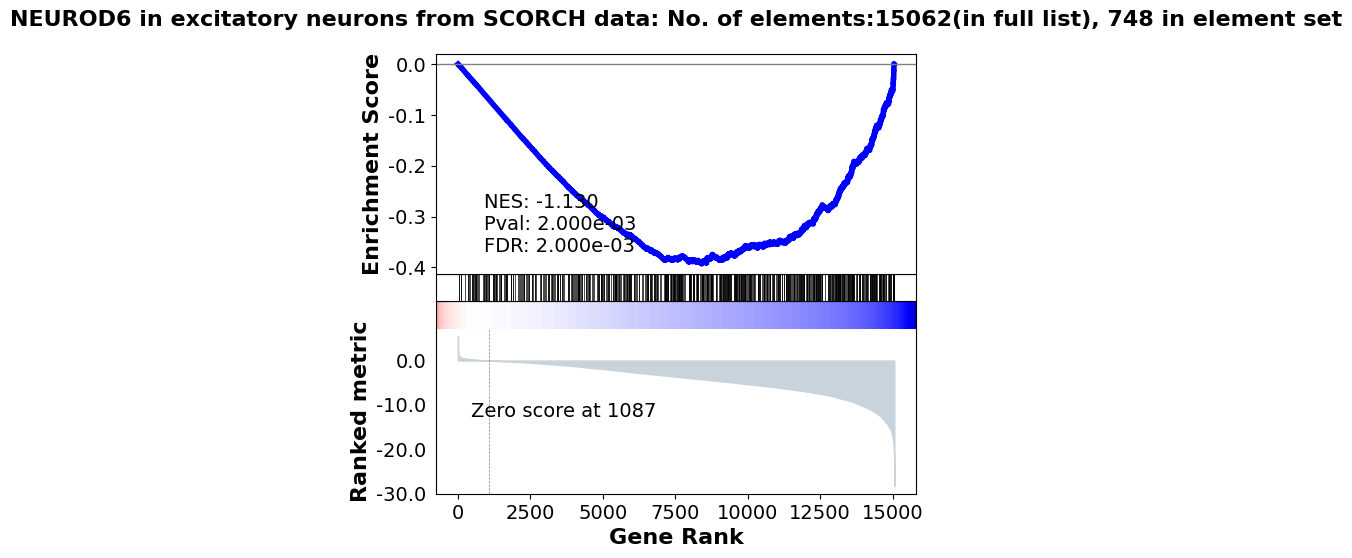

In [6]:
diff_exp_signature = mra_signature_l6it
num_genes = len(diff_exp_signature)
    #print(num_genes)
gene_set = neurod6_targets_l6it
num_in_set = len(gene_set)
gene="NEUROD6"


gsea_result = gseapy.prerank(rnk=diff_exp_signature,
                                 gene_sets={gene+" in excitatory neurons from SCORCH data: No. of elements:"+str(len(diff_exp_signature))+"(in full list), "+ str(len(gene_set))+" in element set" 
                                            :gene_set}, max_size=1000, figsize=10
                            ,organism='human')

gseapy.gseaplot(rank_metric=gsea_result.ranking, term=gsea_result.res2d.Term[0], **gsea_result.results[gsea_result.res2d.Term[0]],color='blue')

In [38]:
exc_mra_frame=pd.DataFrame(index=dict(exc_mra.rx2['nes'].items()).keys(),columns=['nes'],data=dict(exc_mra.rx2['nes'].items()).values())
exc_mra_frame.loc[:,'pvalue']=dict(exc_mra.rx2['pvalue'].items()).values()

In [70]:
exc_mra_frame.iloc[np.where((exc_mra_frame.pvalue<0.05)&
                            (exc_mra_frame.nes>0))[0],:].sort_values(by='nes',ascending=False).reset_index().rename(
    {'index':'up MRs','nes':'pos nes'},axis=1).to_csv('/gpfs/home/ajoshi/results/SCORCH_HIV/exc_upMRs_hivVSctrl_advADregulon.tsv',sep='\t',index=False)

In [69]:
exc_mra_frame.iloc[np.where((exc_mra_frame.pvalue<0.05)
                            &(exc_mra_frame.nes<0))[0],:].sort_values(by='nes').reset_index().rename(
    {'index':'down MRs','nes':'neg nes'},axis=1).to_csv('/gpfs/home/ajoshi/results/SCORCH_HIV/exc_downMRs_hivVSctrl_advADregulon.tsv',sep='\t',index=False)

In [3]:
def convert_rds_to_tsv(file_path_rds):
    readRDS = robjects.r['readRDS']
    rds = readRDS(file_path_rds)
    rds_frame = pd.DataFrame(index=dict(rds.rx2['nes'].items()).keys(),columns=['nes'],data=dict(rds.rx2['nes'].items()).values())
    rds_frame.loc[:,'pvalue']=dict(rds.rx2['pvalue'].items()).values()
    rds_frame.iloc[np.where((rds_frame.pvalue<0.05))[0],:].sort_values(by='pvalue').reset_index().to_csv(
        file_path_rds.replace("RDS","tsv"),sep='\t',index=False)

In [6]:
convert_rds_to_tsv('/gpfs/home/ajoshi/results/SCORCH_HIV/mra_l5et_hiv_Celine_regulon.RDS')

In [4]:
readRDS=robjects.r['readRDS']
inh_mra = readRDS('/gpfs/home/ajoshi/results/SCORCH_HIV/mra_inh_hiv_Celine_regulon.RDS')

inh_mra_frame=pd.DataFrame(index=dict(inh_mra.rx2['nes'].items()).keys(),columns=['nes'],data=dict(inh_mra.rx2['nes'].items()).values())
inh_mra_frame.loc[:,'pvalue']=dict(inh_mra.rx2['pvalue'].items()).values()

inh_mra_frame.iloc[np.where((inh_mra_frame.pvalue<0.05)&
                            (inh_mra_frame.nes>0))[0],:].sort_values(by='nes',ascending=False).reset_index().rename(
    {'index':'up MRs','nes':'pos nes'},axis=1).to_csv('/gpfs/home/ajoshi/results/SCORCH_HIV/inh_upMRs_hivVSctrl_Celine_regulon.tsv',sep='\t',index=False)
inh_mra_frame.iloc[np.where((inh_mra_frame.pvalue<0.05)
                            &(inh_mra_frame.nes<0))[0],:].sort_values(by='nes').reset_index().rename(
    {'index':'down MRs','nes':'neg nes'},axis=1).to_csv('/gpfs/home/ajoshi/results/SCORCH_HIV/inh_downMRs_hivVSctrl_Celine_regulon.tsv',sep='\t',index=False)

In [5]:
readRDS=robjects.r['readRDS']
glia_mra = readRDS('/gpfs/home/ajoshi/results/SCORCH_HIV/mra_glia_hiv_Celine_regulon.RDS')

glia_mra_frame=pd.DataFrame(index=dict(glia_mra.rx2['nes'].items()).keys(),columns=['nes'],data=dict(glia_mra.rx2['nes'].items()).values())
glia_mra_frame.loc[:,'pvalue']=dict(glia_mra.rx2['pvalue'].items()).values()

glia_mra_frame.iloc[np.where((glia_mra_frame.pvalue<0.05)&
                            (glia_mra_frame.nes>0))[0],:].sort_values(by='nes',ascending=False).reset_index().rename(
    {'index':'up MRs','nes':'pos nes'},axis=1).to_csv('/gpfs/home/ajoshi/results/SCORCH_HIV/glia_upMRs_hivVSctrl_Celine_regulon.tsv',sep='\t',index=False)
glia_mra_frame.iloc[np.where((glia_mra_frame.pvalue<0.05)
                            &(glia_mra_frame.nes<0))[0],:].sort_values(by='nes').reset_index().rename(
    {'index':'down MRs','nes':'neg nes'},axis=1).to_csv('/gpfs/home/ajoshi/results/SCORCH_HIV/glia_downMRs_hivVSctrl_Celine_regulon.tsv',sep='\t',index=False)

In [73]:
readRDS=robjects.r['readRDS']
ai_mra = readRDS('/gpfs/home/ajoshi/results/SCORCH_HIV/mra_allImmune_hiv_advADregulon.RDS')

ai_mra_frame=pd.DataFrame(index=dict(ai_mra.rx2['nes'].items()).keys(),columns=['nes'],data=dict(ai_mra.rx2['nes'].items()).values())
ai_mra_frame.loc[:,'pvalue']=dict(ai_mra.rx2['pvalue'].items()).values()

ai_mra_frame.iloc[np.where((ai_mra_frame.pvalue<0.05)&
                            (ai_mra_frame.nes>0))[0],:].sort_values(by='nes',ascending=False).reset_index().rename(
    {'index':'up MRs','nes':'pos nes'},axis=1).to_csv('/gpfs/home/ajoshi/results/SCORCH_HIV/allImmune_upMRs_hivVSctrl_advADregulon.tsv',sep='\t',index=False)
ai_mra_frame.iloc[np.where((ai_mra_frame.pvalue<0.05)
                            &(ai_mra_frame.nes<0))[0],:].sort_values(by='nes').reset_index().rename(
    {'index':'down MRs','nes':'neg nes'},axis=1).to_csv('/gpfs/home/ajoshi/results/SCORCH_HIV/allImmune_downMRs_hivVSctrl_advADregulon.tsv',sep='\t',index=False)

In [16]:
readRDS=robjects.r['readRDS']
ai_mra = readRDS('/gpfs/home/ajoshi/results/SCORCH_HIV/mra_Immune_sanna_hiv_advADregulon.RDS')

ai_mra_frame=pd.DataFrame(index=dict(ai_mra.rx2['nes'].items()).keys(),columns=['nes'],data=dict(ai_mra.rx2['nes'].items()).values())
ai_mra_frame.loc[:,'pvalue']=dict(ai_mra.rx2['pvalue'].items()).values()

ai_mra_frame.iloc[np.where((ai_mra_frame.pvalue<0.05)&
                            (ai_mra_frame.nes>0))[0],:].sort_values(by='nes',ascending=False).reset_index().rename(
    {'index':'up MRs','nes':'pos nes'},axis=1).to_csv('/gpfs/home/ajoshi/results/SCORCH_HIV/Immune_sanna_upMRs_hivVSctrl_advADregulon.tsv',sep='\t',index=False)
ai_mra_frame.iloc[np.where((ai_mra_frame.pvalue<0.05)
                            &(ai_mra_frame.nes<0))[0],:].sort_values(by='nes').reset_index().rename(
    {'index':'down MRs','nes':'neg nes'},axis=1).to_csv('/gpfs/home/ajoshi/results/SCORCH_HIV/Immune_sanna_downMRs_hivVSctrl_advADregulon.tsv',sep='\t',index=False)

In [8]:
readRDS=robjects.r['readRDS']
l23it_mra = readRDS('/gpfs/home/ajoshi/results/SCORCH_HIV/mra_l2-3it_hiv_Celine_regulon.RDS')

l23it_mra_frame=pd.DataFrame(index=dict(l23it_mra.rx2['nes'].items()).keys(),columns=['nes'],data=dict(l23it_mra.rx2['nes'].items()).values())
l23it_mra_frame.loc[:,'pvalue']=dict(l23it_mra.rx2['pvalue'].items()).values()

l23it_mra_frame.iloc[np.where((l23it_mra_frame.pvalue<0.05))[0],:].sort_values(by='pvalue').reset_index(
).to_csv('~/results/SCORCH_HIV/mra_l2-3it_hiv_Celine_regulon.tsv',sep='\t',index=False)


In [14]:
convert_rds_to_tsv("/gpfs/home/ajoshi/results/SCORCH_HIV/mra_l6it_hiv_Celine_regulon.RDS")

TypeError: matplotlib.axes._axes.Axes.bar() got multiple values for keyword argument 'x'

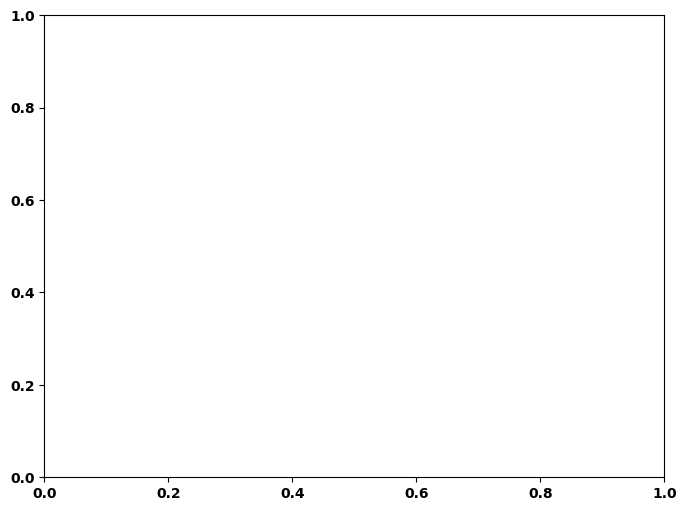

In [46]:
plt.figure(figsize = (8,6))
plt.xticks(size = 10, weight = 'bold')
plt.yticks(size = 10, weight = 'bold')
plt.barh(y=['L2/3 IT','L3-5 IT','L5-6 NP','L6 IT','L6B','L6 CT'],x=[-4.98,-11.86,-4.34,-10.18,-7.47,-11.86],width=1,edgecolor='black')

In [16]:
with open('/gpfs/home/ajoshi/../chewu/project/scHIV_human/pbulk_mra/pbulk_tstat_1750MR.pickle', 'rb') as handle:
    tstat_hiv = pickle.load(handle)

In [35]:
from gseapy import gseaplot2
from gseapy import gseaplot
import matplotlib.transforms as transforms

In [36]:
def MR_gsea_2way(MR,tstat,regulon):
    '''
    Note: need package rpy2, gseapy
    tstat: pandas Series
    MR: name of MR
    regulon: network
    '''
    rnk = tstat.sort_values(ascending=False)
    gene_sets = {'induced': list(base.names(regulon.rx2(MR).rx2('tfmode')).rx(regulon.rx2(MR).rx2('tfmode').ro>0)),
             'repressed': list(base.names(regulon.rx2(MR).rx2('tfmode')).rx(regulon.rx2(MR).rx2('tfmode').ro<0))}
    pre_res = gseapy.prerank(rnk=rnk, gene_sets=gene_sets, thread=4, max_size=2500, seed=2) #for Celine's network, the max target number<2500
    return pre_res.results

In [37]:
def MR_gsea_plot(MR,tstat,regulon=None, hits_ind=None,hits_rep=None):
    '''
    MR: name of MR to be plotted
    hits_ind: list-like showing its induced target position in ranking signature
    hits_rep: list-like showing its repressed target position in ranking signature
    regulon: if hits not provided, regulon network must be provided to calculate hits
    tstat: signature, pandas series
    nes: series of nes
    '''
    # get hits of regulon
    if (hits_ind and hits_rep) is None:
        results = MR_gsea_2way(MR,tstat,regulon)
        hits_ind = results['induced']['hits']
        hits_rep = results['repressed']['hits']
        res_ind = results['induced']['RES']
        res_rep = results['repressed']['RES']

    # making plots
    diy = plt.figure(figsize=(6,5.5))
    
    ax_sig = diy.add_axes([0.1,0.1,0.8,0.2])
    ax_sig.fill_between(range(len(tstat)), y1=tstat.sort_values(ascending=False).values, y2=0, color="#C9D3DB")
    ax_sig.set_ylabel("Ranked metric", fontsize=10)
    
    ax_ind = diy.add_axes([0.1,0.7,0.8,0.1])
    trans1 = transforms.blended_transform_factory(ax_ind.transData, ax_ind.transAxes)
    ax_ind.vlines([0,len(tstat)-1], 0, 1, linewidth=0.5, transform=trans1, color="white", alpha=0)
    ax_ind.vlines(hits_ind, 0, 1, linewidth=0.2, transform=trans1, color="red")
    ax_ind.tick_params(axis="both", which="both", bottom=False, top=False, right=False, left=False,
                       labelbottom=False, labelleft=False, labelsize=12)
    #ax_ind.set_title(f"{MR} ({len(hits_ind)} pos-corr targets, {len(hits_rep)} neg-corr targets)", color='black', fontsize=12)
    
    ax_rep = diy.add_axes([0.1,0.3,0.8,0.1])
    trans2 = transforms.blended_transform_factory(ax_rep.transData, ax_rep.transAxes)
    ax_rep.vlines([0,len(tstat)-1], 0, 1, linewidth=0.5, transform=trans2, color="white", alpha=0)
    ax_rep.vlines(hits_rep, 0, 1, linewidth=0.2, transform=trans2, color="blue")
    ax_rep.tick_params(axis="both", which="both", bottom=False, top=False, right=False, left=False, 
                       labelbottom=False, labelleft=False, labelsize=12)

    ax_res = diy.add_axes([0.1,0.4,0.8,0.3])
    ax_res.plot(range(len(tstat)), res_ind, color='red')
    ax_res.plot(range(len(tstat)), res_rep, color='blue')
    ax_res.axhline(0, color='grey')
    ax_res.set_ylabel("Running Enrichment Score", fontsize=8)
    ax_res.annotate(f"NES={results['induced']['nes']:.2f}, Pval={results['induced']['pval']:.2E}", xy=(0.6,1), xycoords='axes fraction', 
                    xytext=(0, -1), textcoords='offset fontsize', fontsize='medium', color='red')
    ax_res.annotate(f"NES={results['repressed']['nes']:.2f}, Pval={results['repressed']['pval']:.2E}", xy=(0,0), xycoords='axes fraction', 
                    xytext=(+0.5, +0.5), textcoords='offset fontsize', fontsize='medium', color='blue')
    ax_res.tick_params(axis="both", which="both", bottom=False, top=False, right=False, left=False, 
                       labelbottom=False, labelleft=True, labelsize=10)

    diy.text(0.31, 0.82, f"{MR} w/", ha="right", va="bottom", size="medium")
    diy.text(0.33, 0.82, f"{len(hits_ind)} pos-corr targets, ", ha="left", va="bottom", size="medium", color='red')
    diy.text(0.58,0.82, f"{len(hits_rep)} neg-corr targets ", ha="left", va="bottom", size="medium",color="blue")
    
    plt.show()
    return diy

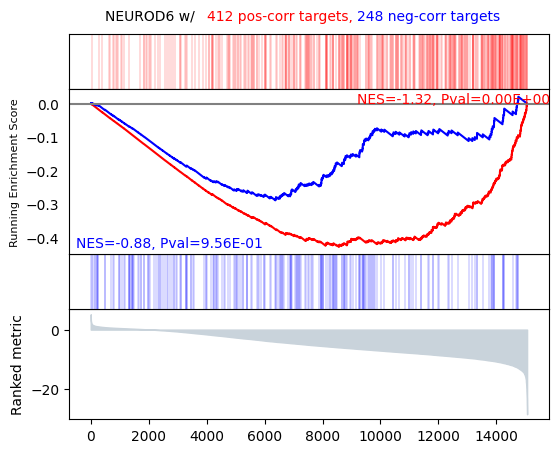

In [38]:
fig = MR_gsea_plot('NEUROD6',pd.Series(mra_signature_exc.sig),regulon=regulon_Celine[0])